In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [12]:
data = pd.read_csv('C://Users/User/Downloads/athlete_events.csv')
regions = pd.read_csv('C://Users/User/Downloads/noc_regions.csv')

In [13]:
data.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [14]:
data.isnull().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
dtype: bool

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [16]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [17]:
merged = pd.merge(data, regions, on='NOC', how='left')
merged['Weight'].fillna(merged['Weight'].mean(),inplace=True)
merged.loc[merged['Medal']=='Gold','Medal']=3
merged.loc[merged['Medal']=='Silver','Medal']=2
merged.loc[merged['Medal']=='Bronze','Medal']=1
merged['Medal'].fillna(0,inplace=True)

In [18]:
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,3,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,Netherlands,NaN


In [20]:
goldMedals = merged[(merged.Medal == 3)]
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,3,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,3,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,3,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,3,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.000000,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,3,Norway,NaN


In [21]:
goldMedals = goldMedals[np.isfinite(goldMedals['Age'])]

Text(0.5,1,u'Distribution of Gold Medals')

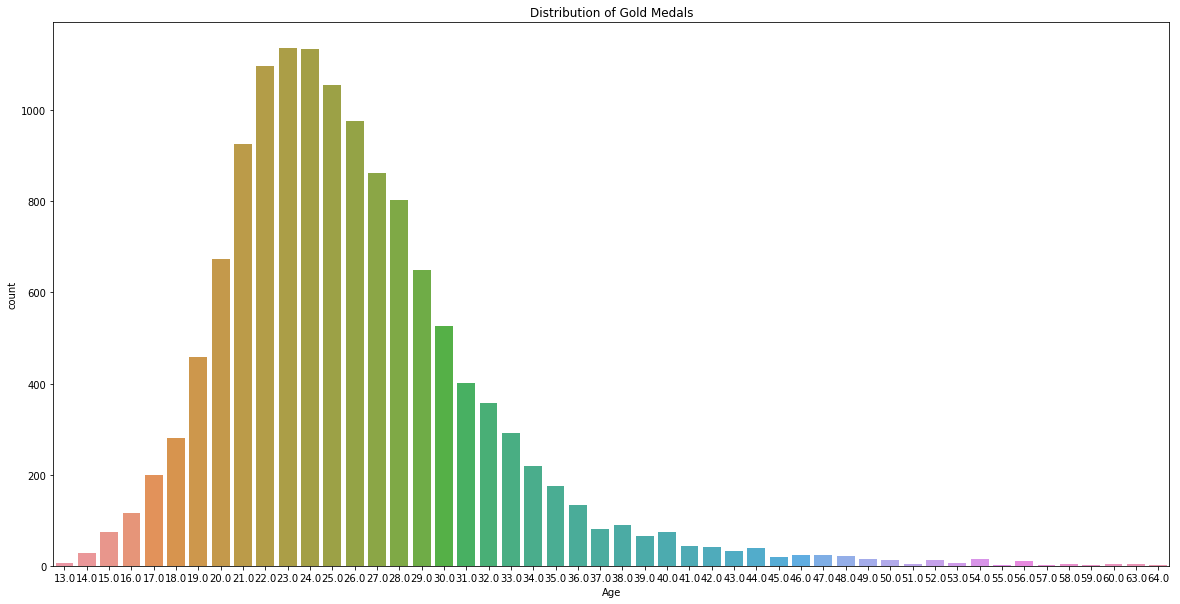

In [22]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(goldMedals['Age'])
plt.title('Distribution of Gold Medals')

In [23]:
usaGold=goldMedals[(goldMedals.Team=='United States')]

In [24]:
usaGold.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
283,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,70.702393,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,3,USA,NaN
609,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.000000,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,3,USA,NaN
739,423,Michael Brent Abernathy,M,22.0,182.0,84.000000,United States,USA,2000 Summer,2000,Summer,Sydney,Baseball,Baseball Men's Baseball,3,USA,NaN
787,454,"Edgar Allen ""Ed"" Ablowich",M,19.0,182.0,68.000000,United States,USA,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Men's 4 x 400 metres Relay,3,USA,NaN
1239,699,"Charles Edwin ""Charley"" Ackerly",M,22.0,NaN,70.702393,United States,USA,1920 Summer,1920,Summer,Antwerpen,Wrestling,"Wrestling Men's Featherweight, Freestyle",3,USA,NaN


Text(0.5,1,u'Distribution of Gold Medals')

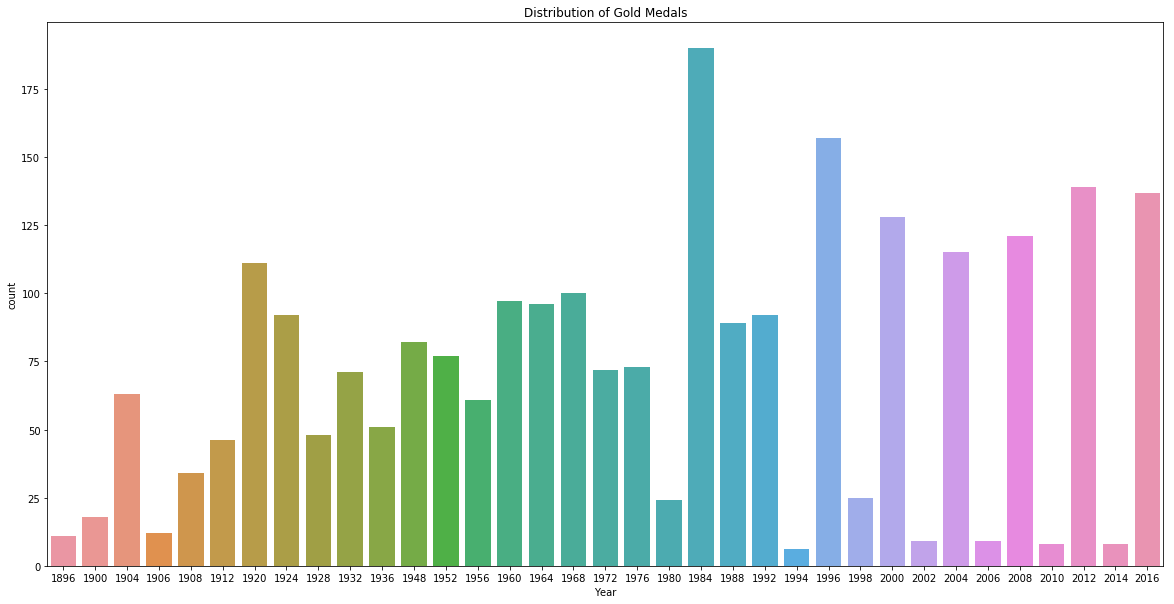

In [25]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(usaGold['Year'])
plt.title('Distribution of Gold Medals')

In [26]:
womenInOlympics = merged[(merged.Sex == 'F') & (merged.Season == 'Summer')]

In [27]:
womenInOlympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,70.702393,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,0,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,70.702393,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,0,Netherlands,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.500000,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,0,Finland,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.500000,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,0,Finland,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,70.702393,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,3,Norway,NaN


Text(0.5,1,u'Women medals per edition of the Games')

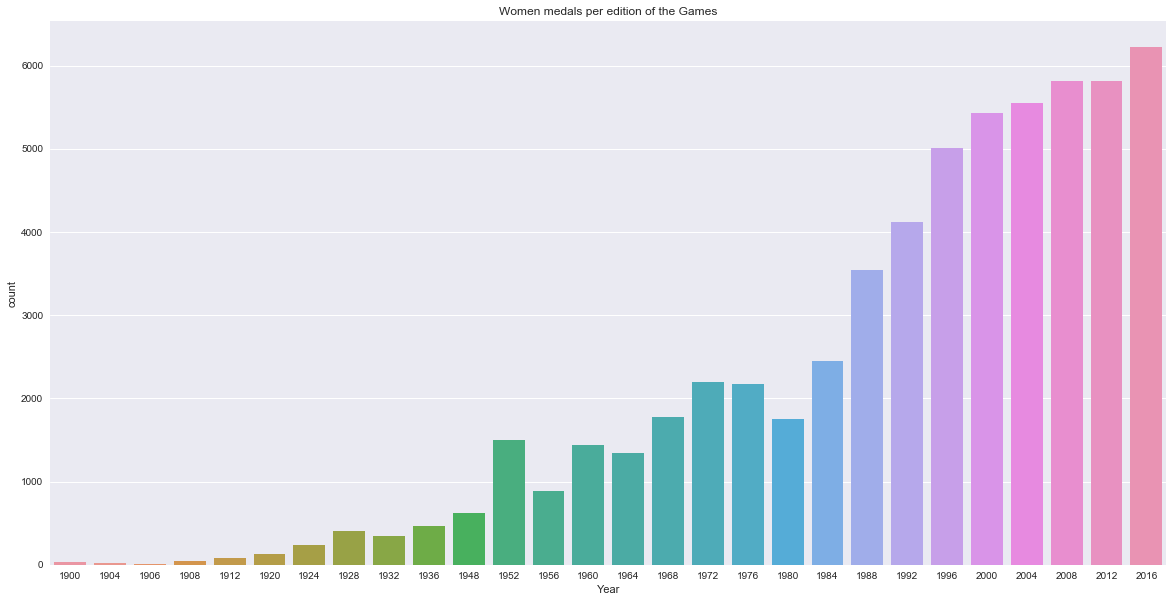

In [28]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(womenInOlympics['Year'])
plt.title('Women medals per edition of the Games')

In [30]:
womanGold=womenInOlympics[(womenInOlympics.Medal==3)]

In [31]:
womanGold.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,70.702393,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,3,Norway,NaN
283,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,70.702393,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,3,USA,NaN
1494,832,Nicola Virginia Adams,F,29.0,164.0,51.000000,Great Britain,GBR,2012 Summer,2012,Summer,London,Boxing,Boxing Women's Flyweight,3,UK,NaN
1495,832,Nicola Virginia Adams,F,33.0,164.0,51.000000,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Women's Flyweight,3,UK,NaN
1527,846,Valerie Kasanita Adams-Vili (-Price),F,23.0,193.0,120.000000,New Zealand,NZL,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Shot Put,3,New Zealand,NaN


Text(0.5,1,u'Women Gold medals per Age of the Games')

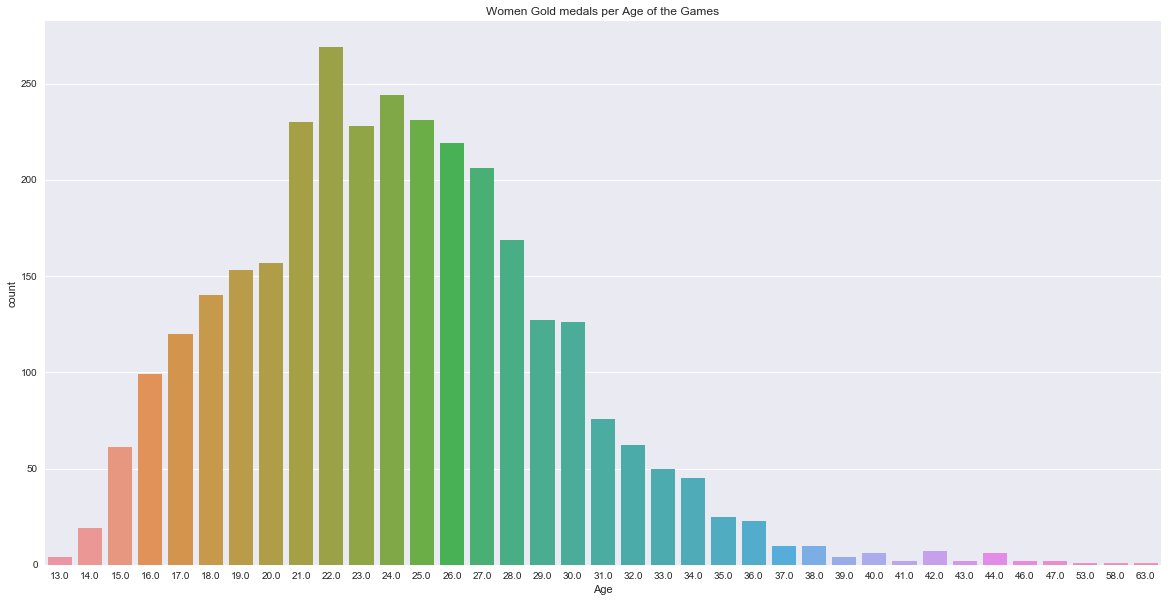

In [32]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(womanGold['Age'])
plt.title('Women Gold medals per Age of the Games')

In [33]:
womanGold30=womanGold[(womanGold.Age>=30)]

Text(0.5,1,u'Women Gold medals above 30 years in each of the Games')

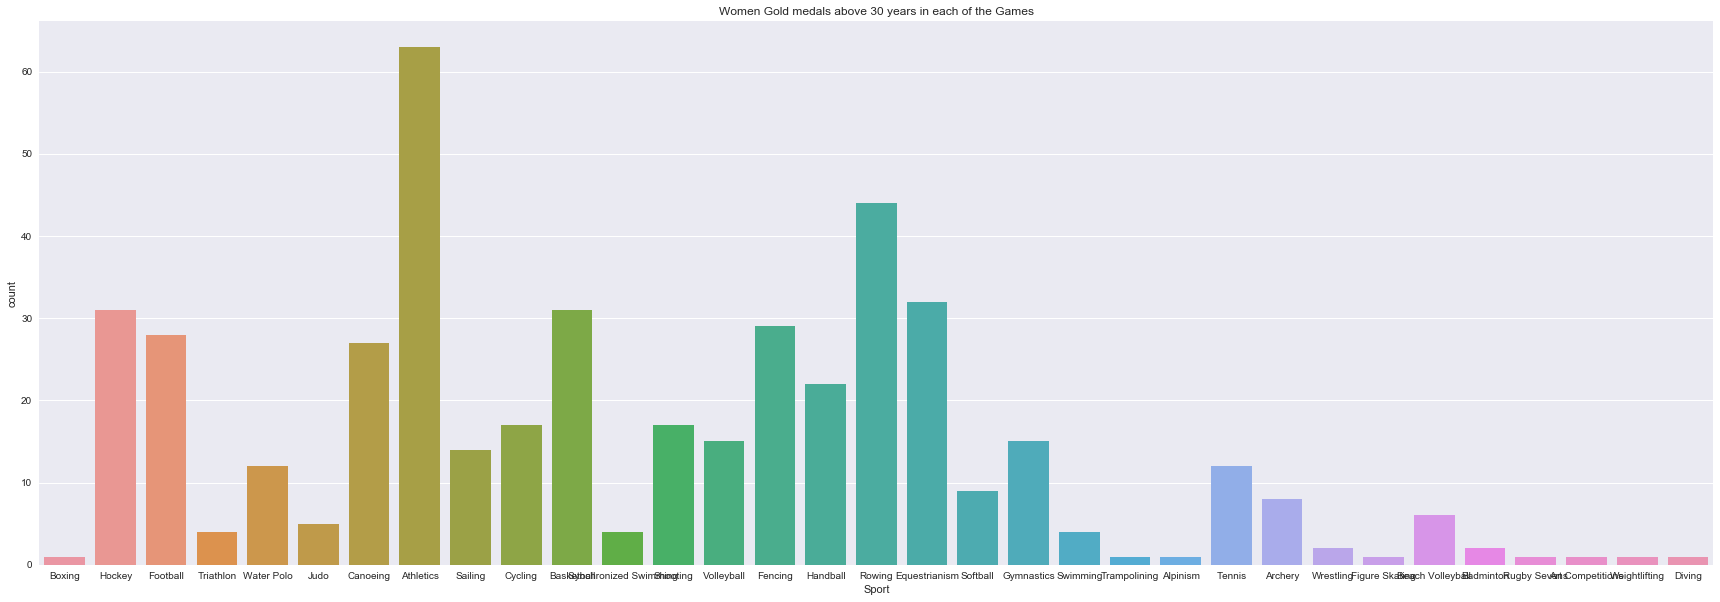

In [34]:
sns.set(style="darkgrid")
plt.figure(figsize=(30, 10))
sns.countplot(womanGold30['Sport'])
plt.title('Women Gold medals above 30 years in each of the Games')

In [35]:
corr=goldMedals.corr()

In [36]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

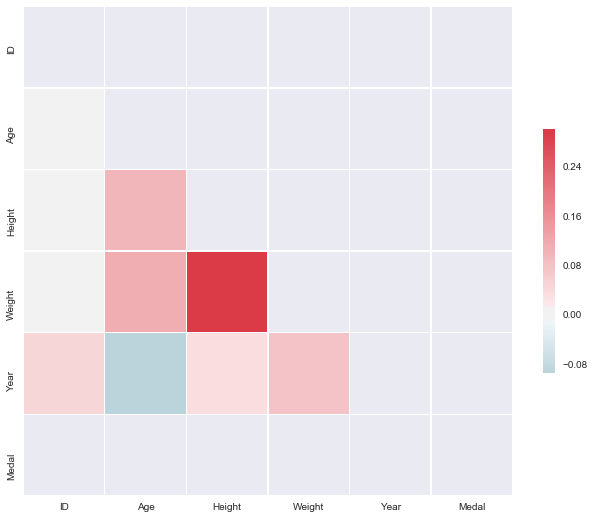

In [37]:
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})